## Mean CGPA of Girls vs Boys

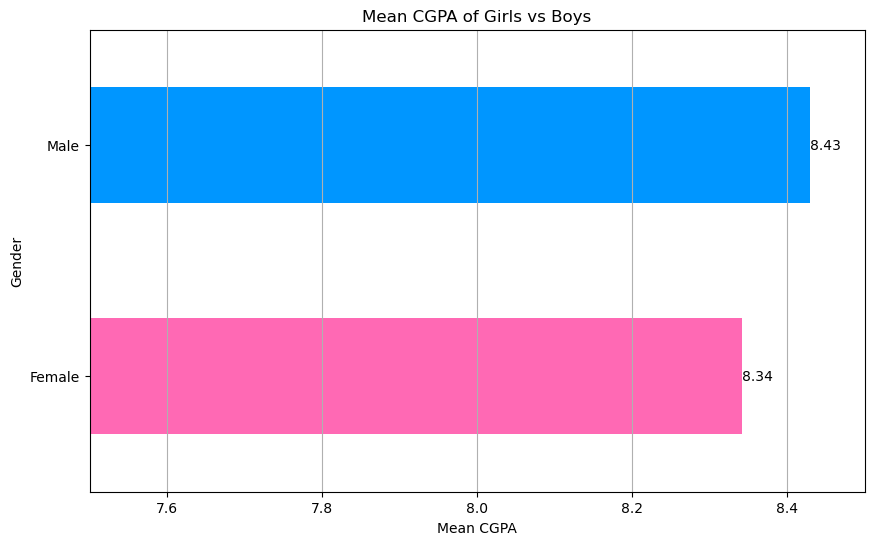

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Modified_Response.csv")  
mean_cgpa_by_gender = data.groupby('Gender')['What is your current CGPA? (ex. 7.73)'].mean()

plt.figure(figsize=(10, 6)) 
bar_colors = ['#FF69B4', '#0096FF']  
mean_cgpa_by_gender.plot(kind='barh', color=bar_colors) 

for index, value in enumerate(mean_cgpa_by_gender):
    plt.text(value, index, f"{value:.2f}", va='center')  

plt.xlabel('Mean CGPA')
plt.ylabel('Gender')
plt.title('Mean CGPA of Girls vs Boys')
plt.grid(axis='x')  
plt.xlim(7.5, 8.5)  
plt.show()


## Proportion of students on basis of hours of weekly classes

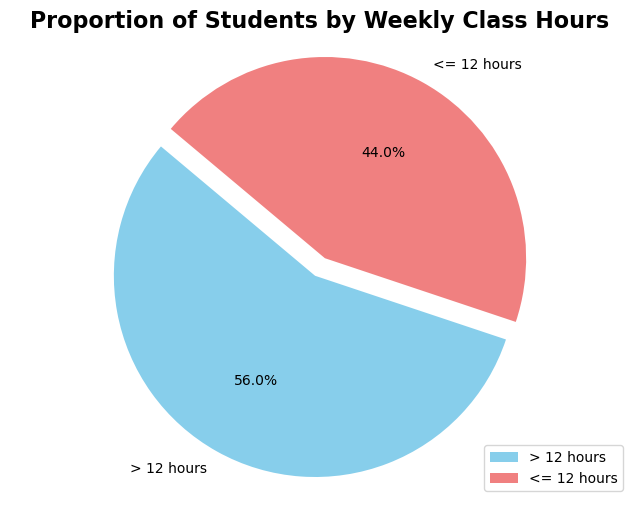

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("attendance.csv")

classes_greater_than_12 = (data['Hours_in_week'] == '> 12 hours').sum()
classes_less_than_12 = (data['Hours_in_week'] == '<= 12 hours').sum()

labels = ['> 12 hours', '<= 12 hours']
sizes = [classes_greater_than_12, classes_less_than_12]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'], explode=(0, 0.1))
plt.title('Proportion of Students by Weekly Class Hours', fontsize=16, fontweight='bold')
plt.axis('equal')  
plt.legend(loc='lower right')

plt.show()


## Number of Students in UG vs PG depending on peers attendance

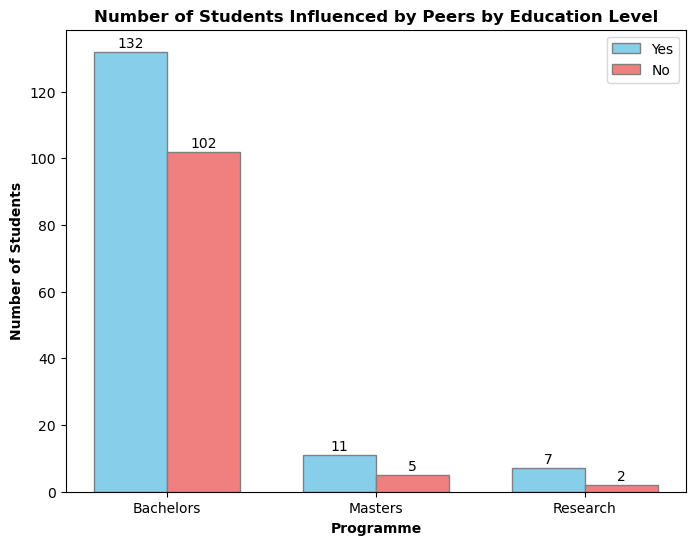

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("attendance.csv") 
ug_counts = data[data['Peers_influence'] == 'Yes']['Programme'].value_counts()
pg_counts = data[data['Peers_influence'] == 'No']['Programme'].value_counts()

plt.figure(figsize=(8, 6))

barWidth = 0.35

r1 = range(len(ug_counts))
r2 = [x + barWidth for x in r1]

plt.bar(r1, ug_counts, color='skyblue', edgecolor='grey', width=barWidth, label='Yes')
plt.bar(r2, pg_counts, color='lightcoral', edgecolor='grey', width=barWidth, label='No')

for i, count in enumerate(ug_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

for i, count in enumerate(pg_counts):
    plt.text(i + barWidth, count + 0.5, str(count), ha='center', va='bottom')

plt.xlabel('Programme', fontweight='bold')
plt.ylabel('Number of Students', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(ug_counts))], ug_counts.index)
plt.title('Number of Students Influenced by Peers by Education Level', fontweight='bold')

plt.legend()

plt.show()


## GIF for CLT 

In [ ]:
import os
import imageio
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

def gif(path, name):
    files = os.listdir(f'{path}')
    image_path = [os.path.join(f'{path}', file) for file in files]
    images = []
    for img in image_path:
        images.append(imageio.imread(img))
    imageio.mimwrite(f'{name}.gif', images, fps=5)

data = pd.read_csv("Modified_Response.csv") 

cgpa_values = data['What is your current CGPA? (ex. 7.73)'].tolist()

x = np.linspace(5, 9, 1000)

ks = range(30, 80)
for k in ks:
    mu = []   
    for i in range(1, 1000):
        cgpa_values_copy = list(cgpa_values)  
        for p in range(len(cgpa_values) // k):
            total_sum = 0
            for j in range(k):
                total_sum += cgpa_values_copy.pop(random.randrange(len(cgpa_values_copy)))
            mu.append(total_sum / k)
    mu.sort()
    
    z=np.linspace(np.min(mu)-1,np.max(mu)+1,100)
    z1=[0]*100
    for i in range(len(mu)):
        for j in range(99):
            if(z[j]<=mu[i] and z[j+1]>mu[i]):
                z1[j]+=1
                break
    fig1, ax1= plt.subplots()
    ax1.grid()
    plt.ylim(top=350)
    plt.xlim(5,9)
    ax1.scatter(z,z1,label=f'n={k}')
    ax1.legend()
    plt.savefig(f'CLT_figs_curve\{k:003}',dpi=100,facecolor='white')
gif("CLT_figs_curve", "CLT_animation_bell_curve")
